In [1]:
import sympy as sp

In [ ]:
a = sp.Symbol('v',real=True)
v = sp.Symbol('v',real=True)
x = sp.Symbol('x',real=True)

alfa = sp.symbols(r'\alpha',real=True,positive=True)
beta = sp.symbols(r'\beta',real=True,positive=True)
g = sp.symbols(r'g',real=True,positive=True)

# For free-fall analysis

In [ ]:
chisq_summand = (a + alfa*v + beta*v**2 + g)**2
chisq_deriv_a = sp.diff(chisq_summand,alfa).expand()
chisq_deriv_b = sp.diff(chisq_summand,beta).expand()
chisq_deriv_g = sp.diff(chisq_summand,g).expand()

In [ ]:
sp.init_printing()
display(chisq_deriv_a)
display(chisq_deriv_b)
display(chisq_deriv_g)

In [ ]:
sv   = sp.Symbol(r'(\sum v)',real=True)
sv2  = sp.Symbol(r'(\sum v^{2})',real=True)
sv3  = sp.Symbol(r'(\sum v^{3})',real=True)
sv4  = sp.Symbol(r'(\sum v^{4})',real=True)
sav  = sp.Symbol(r'(\sum av)',real=True)
sa   = sp.Symbol(r'(\sum a)',real=True)
sav2 = sp.Symbol(r'(\sum av^{2})',real=True)
N    = sp.Symbol(r'N',real=True,positive=True)

In [ ]:
A = sp.Matrix([
    [sv2,sv3,sv],
    [sv3,sv4,sv2],
    [sv,sv2,N]
])
b = -1*sp.Matrix([sav,sav2,sa])

In [ ]:
params = A.inv() * b
for i in range(len(params)):
    params[i] = params[i].simplify(deep=True)

In [ ]:
params

### Other Stuff

In [4]:
f = sp.Function('f')
x = sp.Symbol('x',real=True)
h = sp.Symbol('h',real=True,positive=True)
a = sp.symbols('a:5')
a

(a0, a1, a2, a3, a4)

### Forward

In [5]:
result = 0
for i in range(len(a)):
    result += a[i]*sp.series(f(x+i*h),h,n=len(a)).removeO()
result = result.expand().factor(h)
# display(result)

eqs = []

for i in range(len(a)):
    rhs = 0
    
    eq = result.subs(h,0)
    if i == 2: rhs = 1
    eqs.append(eq.factor()/sp.diff(f(x),x,i) - rhs)
    result = result - eq
    result = result.expand().simplify().factor(h)/h
    
for i in range(len(eqs)):
    display(eqs[i])

a0 + a1 + a2 + a3 + a4

a1 + 2*a2 + 3*a3 + 4*a4

a1/2 + 2*a2 + 9*a3/2 + 8*a4 - 1

a1/6 + 4*a2/3 + 9*a3/2 + 32*a4/3

a1/24 + 2*a2/3 + 27*a3/8 + 32*a4/3

In [6]:
sol = sp.solve(eqs,a)

In [7]:
sol

{a0: 35/12, a1: -26/3, a2: 19/2, a3: -14/3, a4: 11/12}

In [8]:
stuff = 0
for i in range(len(sol)):
    stuff += sol[a[i]]*sp.series(f(x+i*h),h,n=len(sol)).removeO()
stuff = stuff.expand().factor(h)
factor = (stuff/sp.diff(f(x),x,2)).doit()
factor

h**2

In [9]:
stuff = 0
for i in range(len(sol)):
    stuff += sol[a[i]]*f(x+i*h)
stuff = stuff.together()/factor
display(stuff)

(35*f(x) - 104*f(h + x) + 114*f(2*h + x) - 56*f(3*h + x) + 11*f(4*h + x))/(12*h**2)

### Backward

In [26]:
result = 0
for i in range(len(a)):
    result += a[i]*sp.series(f(x-i*h),h,n=5).removeO()
result = result.expand().factor(h)
# display(result)

eqs = []

for i in range(len(a)):
    rhs = 0
    
    eq = result.subs(h,0)
    if i == 2: rhs = 1
    eqs.append(eq.factor()/sp.diff(f(x),x,i) - rhs)
    result = result - eq
    result = result.expand().simplify().factor(h)/h
    
for i in range(len(eqs)):
    display(eqs[i])

a0 + a1 + a2 + a3 + a4

-a1 - 2*a2 - 3*a3 - 4*a4

a1/2 + 2*a2 + 9*a3/2 + 8*a4 - 1

-a1/6 - 4*a2/3 - 9*a3/2 - 32*a4/3

a1/24 + 2*a2/3 + 27*a3/8 + 32*a4/3

In [27]:
sol = sp.solve(eqs,a)

In [28]:
sol

{a0: 35/12, a1: -26/3, a2: 19/2, a3: -14/3, a4: 11/12}

In [29]:
stuff = 0
for i in range(len(sol)):
    stuff += sol[a[i]]*sp.series(f(x-i*h),h,n=5).removeO()
stuff = stuff.expand().factor(h)
factor = (stuff/sp.diff(f(x),x,2)).doit()
factor

h**2

In [30]:
stuff = 0
for i in range(len(sol)):
    stuff += sol[a[i]]*f(x-i*h)
stuff = stuff.together()/factor
display(stuff)

(35*f(x) + 11*f(-4*h + x) - 56*f(-3*h + x) + 114*f(-2*h + x) - 104*f(-h + x))/(12*h**2)

### Central

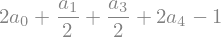

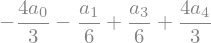

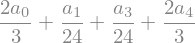

In [154]:
result = a[0]*sp.series(f(x-2*h),h,n=5).removeO()
result += a[1]*sp.series(f(x-h),h,n=5).removeO()
result += a[2]*f(x)
result += a[3]*sp.series(f(x+h),h,n=5).removeO()
result += a[4]*sp.series(f(x+2*h),h,n=5).removeO()
result = result.expand().factor(h)
# display(result)

eqs = []

for i in range(len(a)):
    rhs = 0
    
    eq = result.subs(h,0)
    if i == 2: rhs = 1
    eqs.append(eq.factor()/sp.diff(f(x),x,i) - rhs)
    result = result - eq
    result = result.expand().simplify().factor(h)/h

# eq = result.subs(h,0)
# eqs.append(eq.factor()/sp.diff(f(x),x))
# result = result - eq1
# result = result.expand().simplify().factor(h)/h

# eq = result.subs(h,0)
# eqs.append(eq.factor()/sp.diff(f(x),x,2) - 1)
# result = result - eq2
# result = result.expand().simplify().factor(h)/h

# eq = result.subs(h,0)
# eqs.append(eq.factor()/sp.diff(f(x),x,3))

for i in range(len(eqs)):
    display(eqs[i])
# display(eqs[0])
# display(eqs[1])
# display(eqs[2])
# display(eqs[3])

In [156]:
sol = sp.solve(eqs,a)

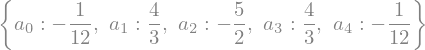

In [157]:
sol

In [163]:
stuff = sol[a[0]]*sp.series(f(x-2*h),h,n=5).removeO()
stuff += sol[a[1]]*sp.series(f(x-h),h,n=5).removeO()
stuff += sol[a[2]]*f(x)
stuff += sol[a[3]]*sp.series(f(x+h),h,n=5).removeO()
stuff += sol[a[4]]*sp.series(f(x+2*h),h,n=5).removeO()
stuff = stuff.expand().factor(h)

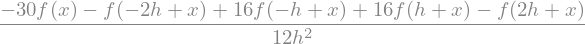

In [170]:
stuff = 0
for i in range(len(sol)):
    stuff += sol[a[i]]*f(x+(i-2)*h)
stuff = stuff.together()/h**2
display(stuff)
# stuff = sol[a[0]]f(x-2*h),h,n=5).removeO()
# stuff += sol[a[1]]*sp.series(f(x-h),h,n=5).removeO()
# stuff += sol[a[2]]*f(x)
# stuff += sol[a[3]]*sp.series(f(x+h),h,n=5).removeO()
# stuff += sol[a[4]]*sp.series(f(x+2*h),h,n=5).removeO()
# stuff = stuff.expand().factor(h)